In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

## **1. 📥 Data Collection**

In [ ]:
from extract_data import get_aapl_data
aapl = get_aapl_data()  # Check extract_data.py
aapl.head()

Loaded data from aapl.csv


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2005-01-03 05:00:00,0.974732,0.979697,0.941929,0.952312,691992000,0.0,0.0
2005-01-04 05:00:00,0.959835,0.985114,0.947497,0.962093,1096810400,0.0,0.0
2005-01-05 05:00:00,0.969916,0.981804,0.963748,0.970519,680433600,0.0,0.0
2005-01-06 05:00:00,0.973076,0.976688,0.952914,0.971271,705555200,0.0,0.0
2005-01-07 05:00:00,0.978042,1.047709,0.974280,1.041991,2227450400,0.0,0.0


## **2. 📊 Exploratory Data Analysis (EDA)**

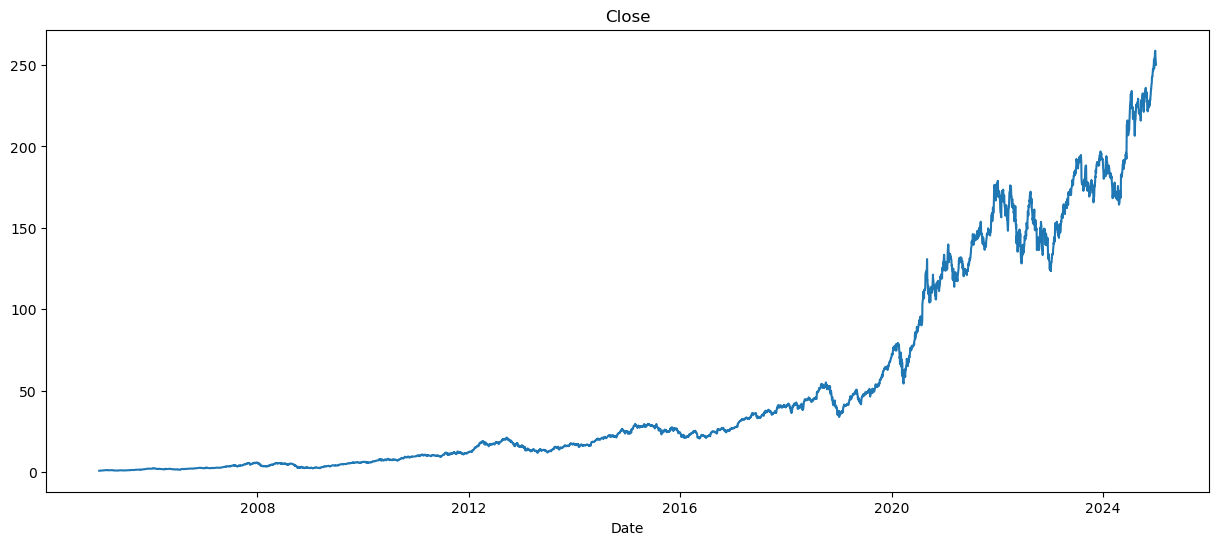

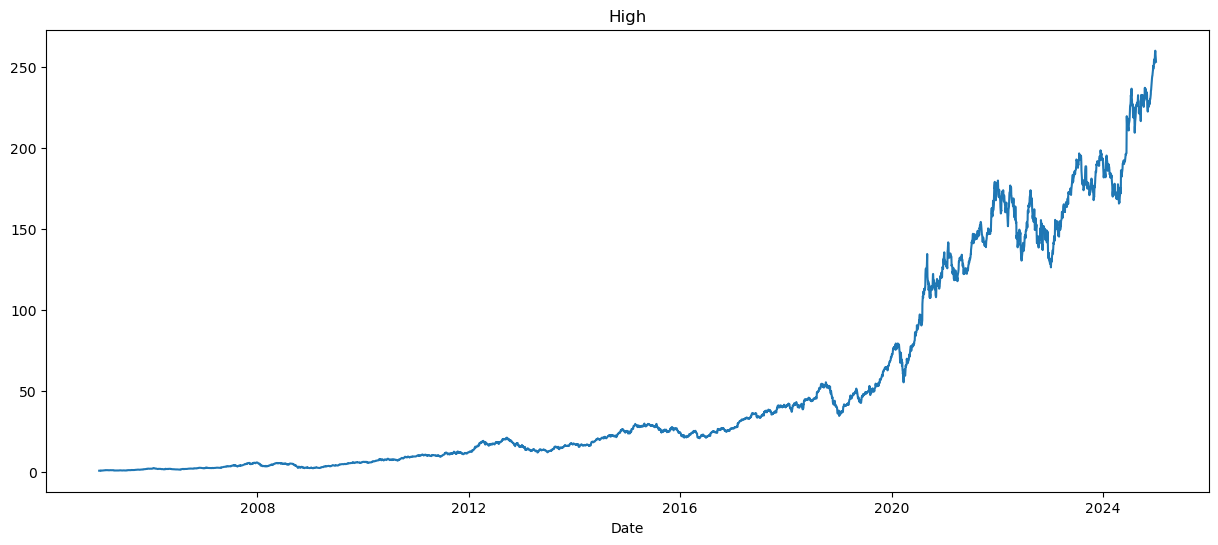

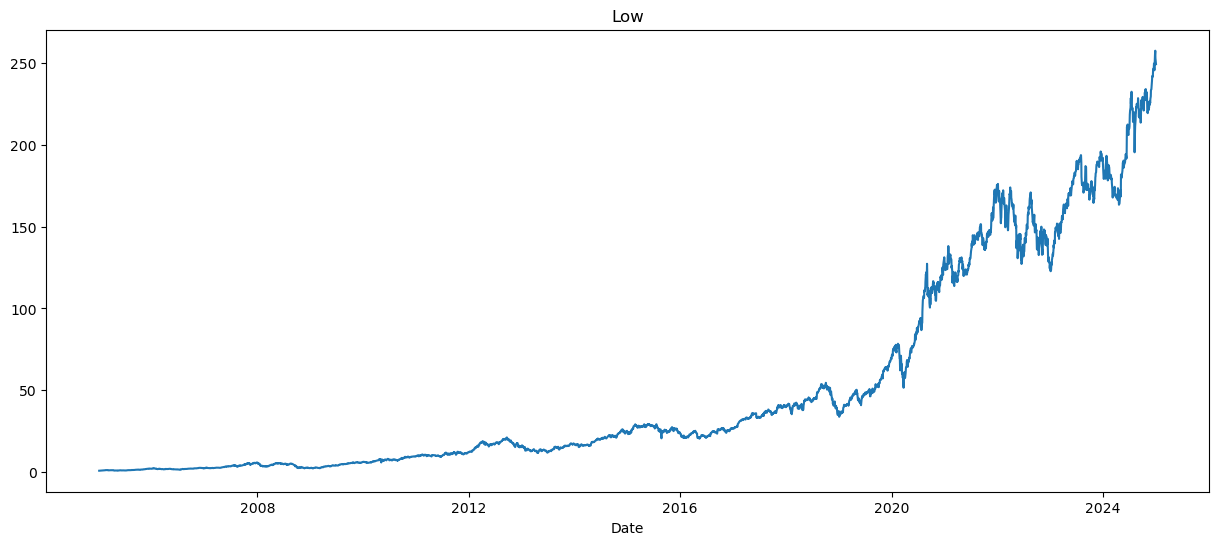

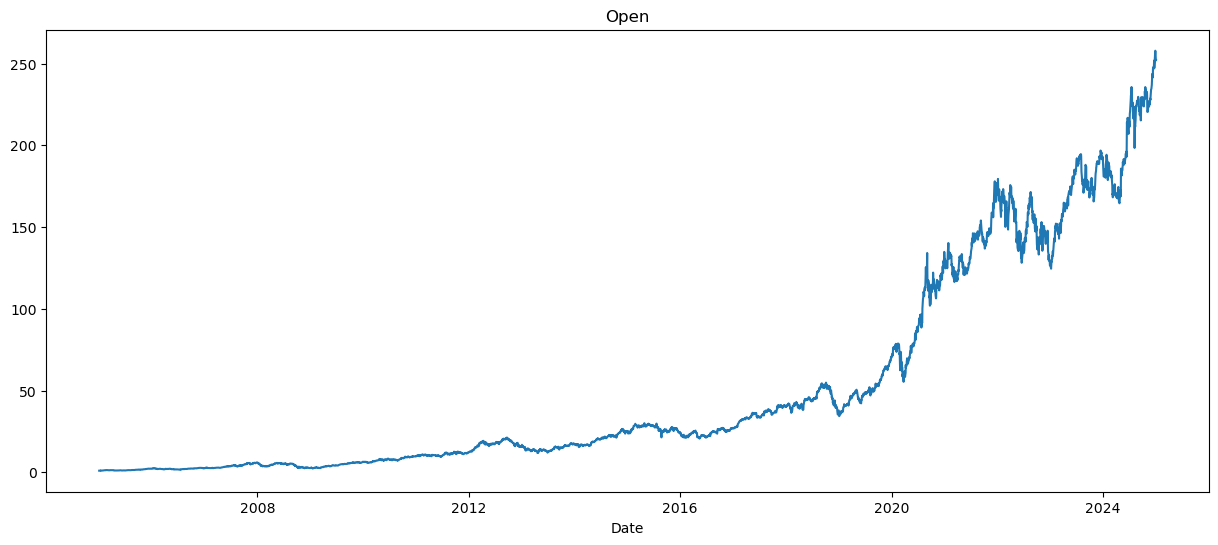

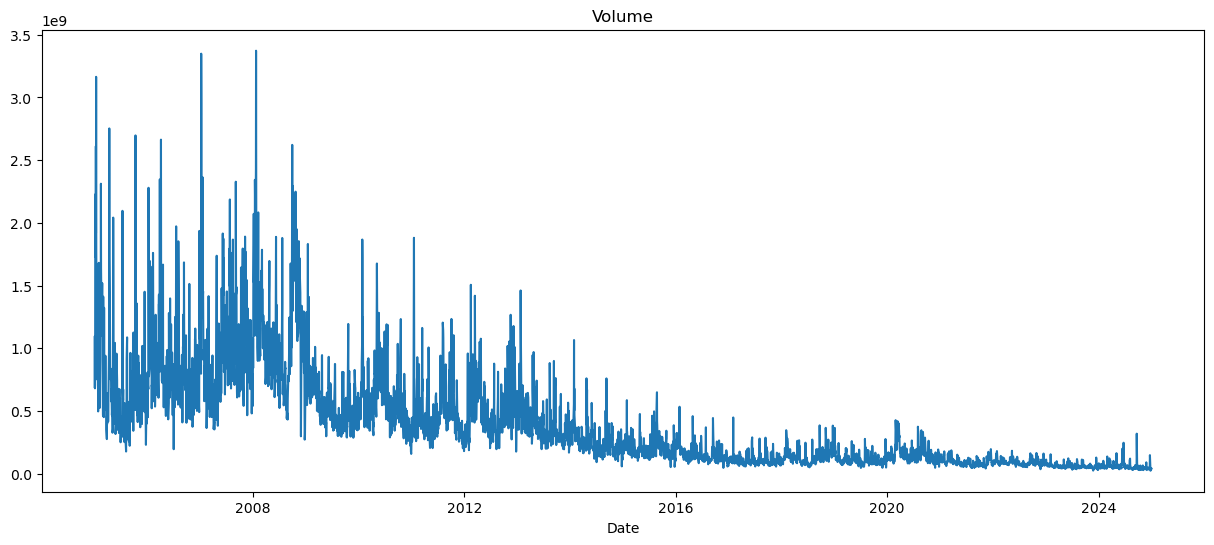

In [4]:
columns = ['Close', 'High', 'Low', 'Open', 'Volume']
for column in columns:
    plt.figure(figsize=(15, 6))
    plt.plot(aapl[column])
    plt.xlabel('Date')
    plt.title(column)
    plt.show();

Returns are typically defined by
$$r_t=\frac{p_t - p_{t-1}}{p_{t-1}}=\frac{p_t}{p_{t-1}-1}$$

| Symbol    | Meaning                                                           |
| --------- | ----------------------------------------------------------------- |
| $r_t$     | **Return** at time $t$; this is the percentage change in price    |
| $p_t$     | **Price** of the asset at time $t$                                |
| $p_{t-1}$ | **Price** of the asset at time $t-1$; the **previous time point** |



In [5]:
aapl["Return (%)"] = aapl["Close"].pct_change()*100
aapl.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return (%)
Date,,,,,,,,
2005-01-03 05:00:00,0.974732,0.979697,0.941929,0.952312,691992000,0.0,0.0,NaN
2005-01-04 05:00:00,0.959835,0.985114,0.947497,0.962093,1096810400,0.0,0.0,1.027029
2005-01-05 05:00:00,0.969916,0.981804,0.963748,0.970519,680433600,0.0,0.0,0.875831
2005-01-06 05:00:00,0.973076,0.976688,0.952914,0.971271,705555200,0.0,0.0,0.077512
2005-01-07 05:00:00,0.978042,1.047709,0.974280,1.041991,2227450400,0.0,0.0,7.281132


In [6]:
best = aapl.loc[aapl['Return (%)'].idxmax()]
worst = aapl.loc[aapl['Return (%)'].idxmin()]

print(f"Best Date: {best.name.date()}\nBest Return: {best['Return (%)']:.4f}%")
print(f"Worst Date: {worst.name.date()}\nWorst Return: {worst['Return (%)']:.4f}%")

Best Date: 2008-10-13
Best Return: 13.9049%
Worst Date: 2008-09-29
Worst Return: -17.9195%


In [7]:
std = aapl['Return (%)'].std()
std_covid = aapl['Return (%)']['2020-03-01':'2025-05-01'].std()
print(f"Standard Deviation: {std:.4f}%")
print(f"Standard Deviation (COVID): {std_covid:.4f}%")

Standard Deviation: 2.0246%
Standard Deviation (COVID): 1.9915%


Standard deviation of `Return` measures the **volatility of risk** of returns - how much they fluctuate from the average.

Standard deviation measures the volatility or dispersion of a stock's returns from its average return. A higher standard deviation indicates that the stock's returns fluctuate more, meaning it has greater unpredictability and risk. Stocks with high standard deviation are more volatile, meaning their price swings are larger and less predictatble.

---

* The **COVID period** has a slightly ***lower standard deviation*** than the overall period.
* $2.0246\%$ vs. $1.9915\%$ is a *very small difference*. so:
    * Volatility during the COVID period was **almost the same** as the general period.
    * This is **somewhat surprising, since COVID-19** is typically associated with higher market volatility.

---

**Possible explanations:**
1. **COVID period might be shorter**, so it doesn't capture all the extreme movements.
2. **Returns could have balanced out** (some big up days, some big down days).
3. **Other highly volatile periods** (e.g., 2008 finanacial crisis) might have also occurred in the full dataset, keeping the overall standard deviation high.

---

> Although COVID-19 disrupted markets, the return volatility (as measured by standard deviation) during the COVID period was very similar to the overall average, suggesting that while the market was turbulent, it was not significantly more volatile than other times in the dataset.

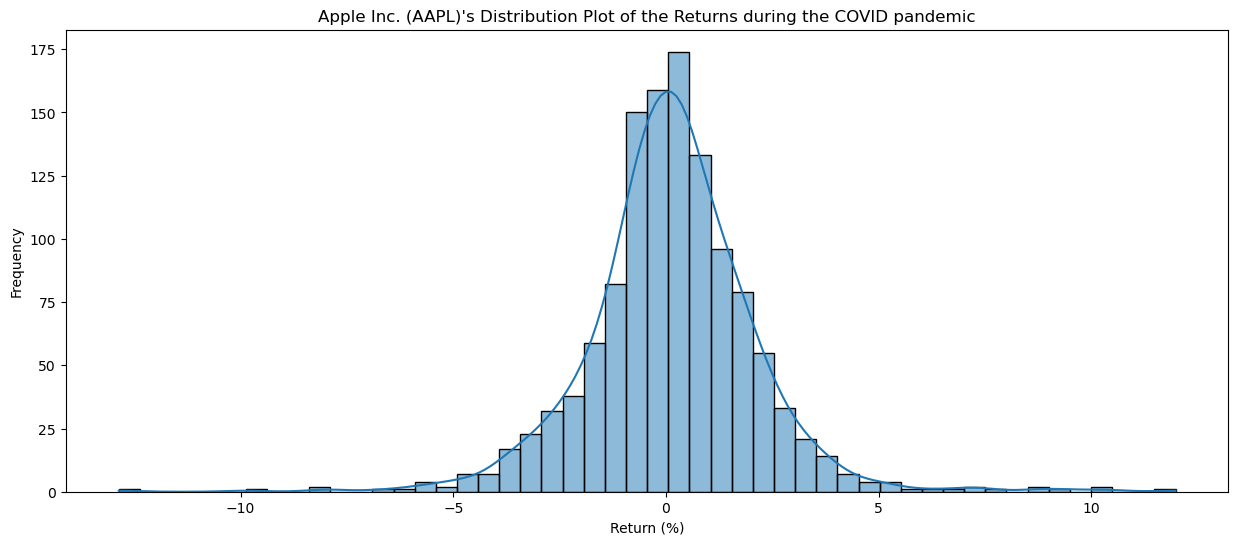

In [8]:
aapl_covid = aapl['Return (%)']['2020-03-01':'2025-05-01'].copy()
plt.figure(figsize=(15, 6))
sns.histplot(aapl_covid, bins=50, kde=True)
plt.title("Apple Inc. (AAPL)'s Distribution Plot of the Returns during the COVID pandemic")
plt.xlabel("Return (%)")
plt.ylabel("Frequency")
plt.show();

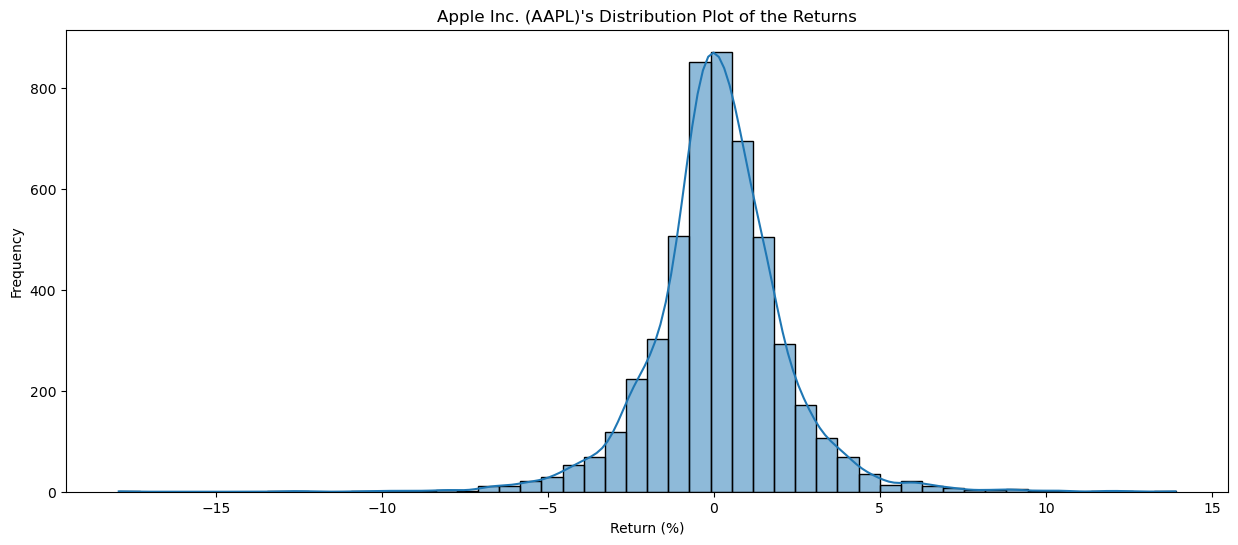

In [9]:
plt.figure(figsize=(15, 6))
sns.histplot(aapl['Return (%)'], bins=50, kde=True)
plt.title("Apple Inc. (AAPL)'s Distribution Plot of the Returns")
plt.xlabel("Return (%)")
plt.ylabel("Frequency")
plt.show();

**1. Normal Market Conditions Plot**
* The distribution is **leptokurtic** (sharp peak and heavy tails).
* The returns are centered around $0\%$ but have **extreme outliers** on both the positive and negative sides.
* It reflects **occasional high volatility**, which is typical over longer periods that include various market conditions.

**2. COVID Pandemic Plot**
* This is tribution is **more symmetrical** and **tightly centered** around $0\%$.
* However, there is still **noticeable kurtosis** (more frequent small returns and some large outliers).
* The tails are **slightly lighter** compared to the full dataset, possibly due to a shorter timeframe or a rally in tech stocks posh-March 2020 crash.
* You can see a slightly **right-skewed shape**, indicating stronger positive returns during the recovery period.

**Key Differences**
| Aspect                  | Normal Period                                  | COVID Period            |
| ----------------------- | ---------------------------------------------- | ----------------------- |
| ***Spread (Volatility)*** | Slightly wider                                 | Slightly narrower       |
| ***Kurtosis***            | High – frequent small returns + large outliers | High but slightly lower |
| ***Skewness***            | Near-symmetric                                 | Mild positive skew      |
| ***Outliers***            | Strong presence on both sides                  | Slightly fewer outliers |

**Conclusion**
* Both distributions show **non-normal characteristics** typical of financial returns.
* During the **COVID pandemic**, the returns became more **concentrated**, possibly due to market intervention, tech stock dominance, or reduced trading noise.

In [10]:
aapl['Prev Close'] = aapl['Close'].shift(1)
aapl['High-Low'] = aapl['High'] - aapl['Low']
aapl['Open-Close'] = aapl['Open'] - aapl['Close']
aapl['Volume'] = aapl['Volume']
aapl['MA10'] = aapl['Close'].rolling(window=10).mean()
aapl['MA20'] = aapl['Close'].rolling(window=20).mean()
aapl['MA50'] = aapl['Close'].rolling(window=50).mean()
aapl = aapl.dropna()
aapl.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Return (%),Prev Close,High-Low,Open-Close,MA10,MA20,MA50
Date,,,,,,,,,,,,,,
2005-03-15 05:00:00,1.223004,1.238051,1.211267,1.232634,508608800,0.0,0.0,1.587284,1.213374,0.026784,-0.009629,1.242053,1.285584,1.170623
2005-03-16 05:00:00,1.240157,1.273260,1.227217,1.239254,697813200,0.0,0.0,0.537104,1.232634,0.046042,0.000903,1.233206,1.281032,1.176362
2005-03-17 05:00:00,1.249787,1.290414,1.243467,1.271455,801920000,0.0,0.0,2.598412,1.239254,0.046947,-0.021668,1.234590,1.276796,1.182549
2005-03-18 05:00:00,1.303956,1.307267,1.278978,1.292822,940150400,0.0,0.0,1.680484,1.271455,0.028289,0.011134,1.235041,1.275374,1.188995
2005-03-21 05:00:00,1.302752,1.323216,1.289812,1.315090,541128000,0.0,0.0,1.722494,1.292822,0.033404,-0.012338,1.237900,1.275818,1.195871


In [11]:
X = aapl[['Prev Close', 'High-Low', 'Open-Close', 'Volume', 'MA10', 'MA20', 'MA50']]
y = aapl['Close']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle=False)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred_train = model.predict(X_train)
mse = mean_squared_error(y_train, y_pred_train)
print(f"Mean Squared Error (Training Set): {mse:.4f}")
mae = mean_absolute_error(y_train, y_pred_train)
print(f"Mean Absolute Error (Training Set): {mae:.4f}")

Mean Squared Error (Training Set): 0.2356
Mean Absolute Error (Training Set): 0.1830


In [15]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Test Set): {mse:.4f}")
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Test Set): {mae:.4f}")

Mean Squared Error (Test Set): 2.9015
Mean Absolute Error (Test Set): 1.1050


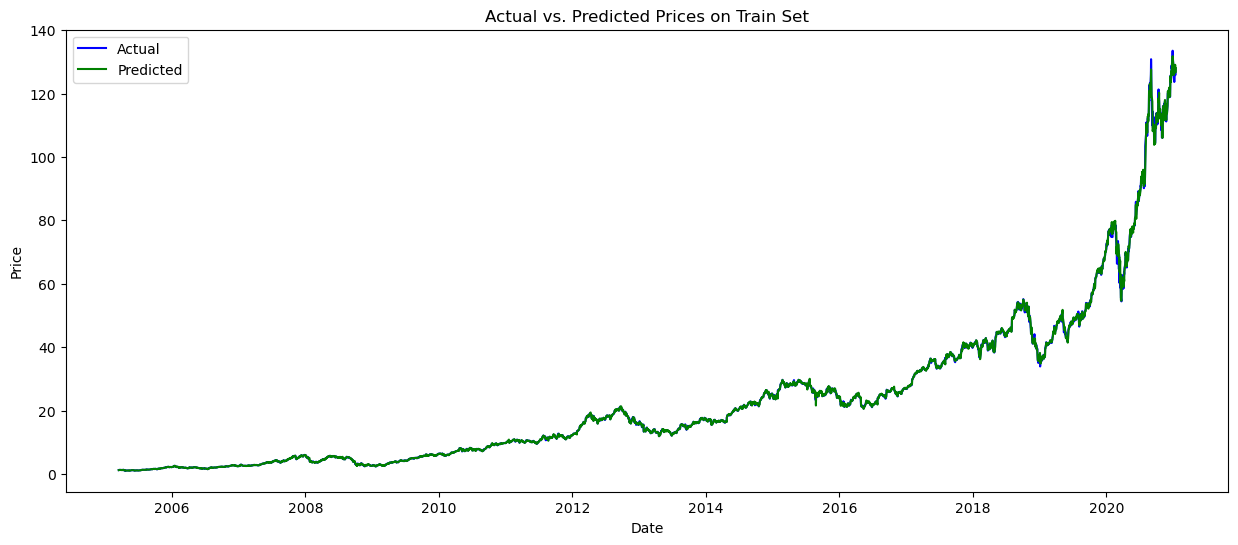

In [16]:
plt.figure(figsize=(15, 6))
plt.plot(y_train.index, y_train, label='Actual', color='b')
plt.plot(y_train.index, y_pred_train, label='Predicted', color='g')
plt.title("Actual vs. Predicted Prices on Train Set")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

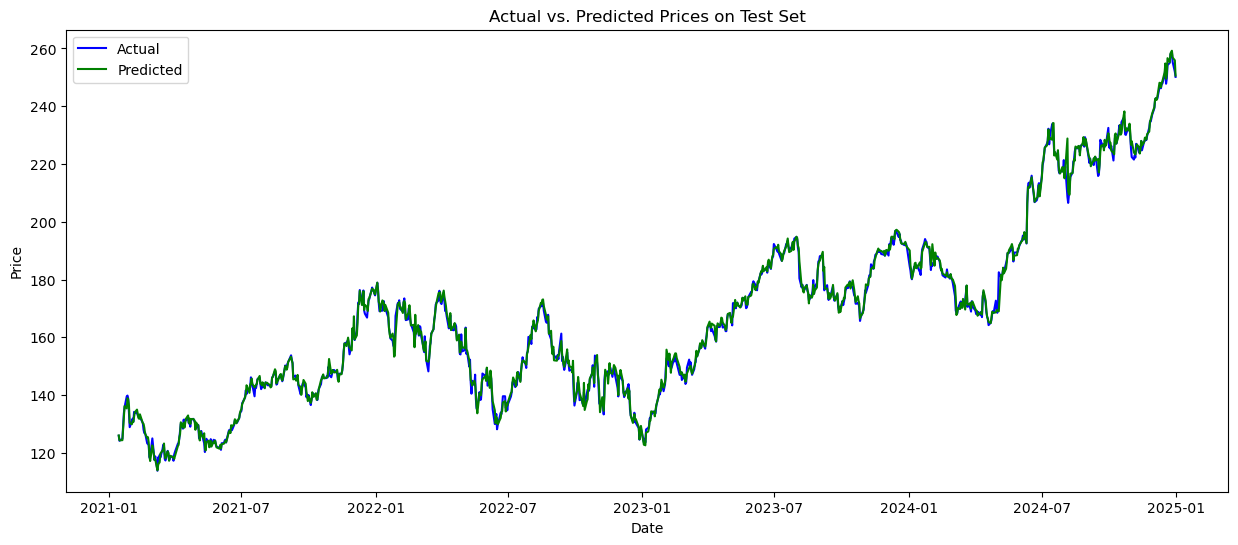

In [17]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.index, y_test, label='Actual', color='b')
plt.plot(y_test.index, y_pred, label='Predicted', color='g')
plt.title("Actual vs. Predicted Prices on Test Set")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()